# CIFAR10 color images classification using Keras
The CIFAR10 dataset (https://www.cs.toronto.edu/%7Ekriz/cifar.html) contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

For inspiration:
* https://www.tensorflow.org/tutorials/images/cnn

In [36]:
# load core libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load Keras (from TensorFlow) for the dataset and building NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model

In [37]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = x_train / 255.0
X_test = x_test / 255.0

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


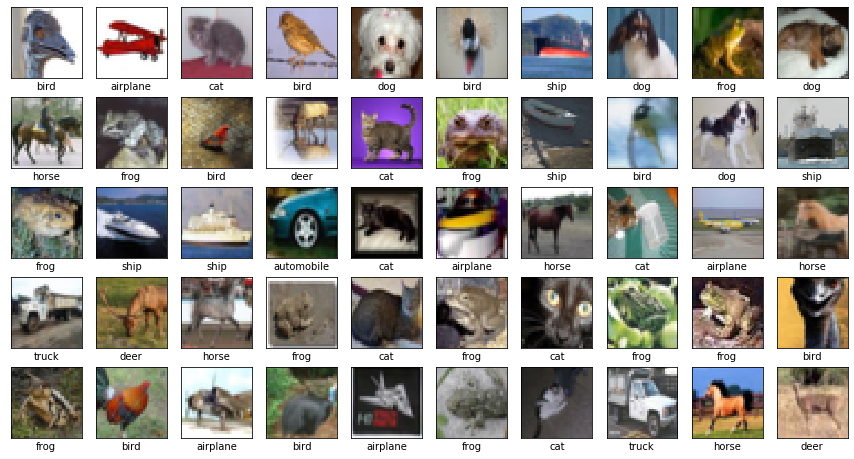

In [38]:
classes = [
    'airplane', 
    'automobile', 
    'bird', 
    'cat', 
    'deer',
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck'
]

import random

plt.figure(figsize=(15, 8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    idx = random.randint(0, len(x_train) - 1)
    plt.imshow(x_train[idx], cmap=plt.cm.binary)
    # The CIFAR labels are arrays
    plt.xlabel(classes[y_train[idx][0]])
plt.show()

In [39]:
# create train/test categories
n_classes = len(classes)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

Y_train: (50000, 10)
Y_test: (10000, 10)


In [40]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

In [41]:
# compiling the sequential model
model.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='adam'
)

In [54]:
# use e.g. 100 epochs
epochs = 20
batch_size = 128

# training the model and saving metrics in history
history = model.fit(
    X_train, 
    Y_train,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 1,
    validation_data=(X_test, Y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.3464 - accuracy: 0.8740 - val_loss: 0.8667 - val_accuracy: 0.7522
Epoch 2/20
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.3489 - accuracy: 0.8720 - val_loss: 0.8616 - val_accuracy: 0.7504
Epoch 3/20
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.3489 - accuracy: 0.8725 - val_loss: 0.8808 - val_accuracy: 0.7454
Epoch 4/20
50000/50000 [==============================] - 81s 2ms/sample - loss: 0.3377 - accuracy: 0.8779 - val_loss: 0.8724 - val_accuracy: 0.7548
Epoch 5/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.3352 - accuracy: 0.8789 - val_loss: 0.8891 - val_accuracy: 0.7473
Epoch 6/20
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.3317 - accuracy: 0.8801 - val_loss: 0.8812 - val_accuracy: 0.7447
Epoch 7/20
50000/50000 [==============================] 

In [55]:
import os
weights_file = os.path.join('results', 'cifar10_weights_v1.h5')
model.save_weights(weights_file)
#model.load_weights(weights_file)

10000/1 - 3s - loss: 0.6781 - accuracy: 0.7461


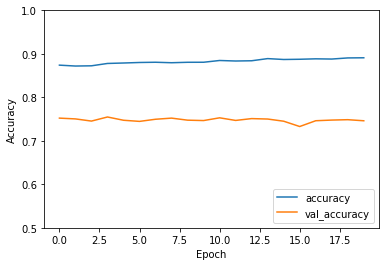

In [56]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

In [49]:
predictions = model.predict(X_test)
predictions.shape

(10000, 10)

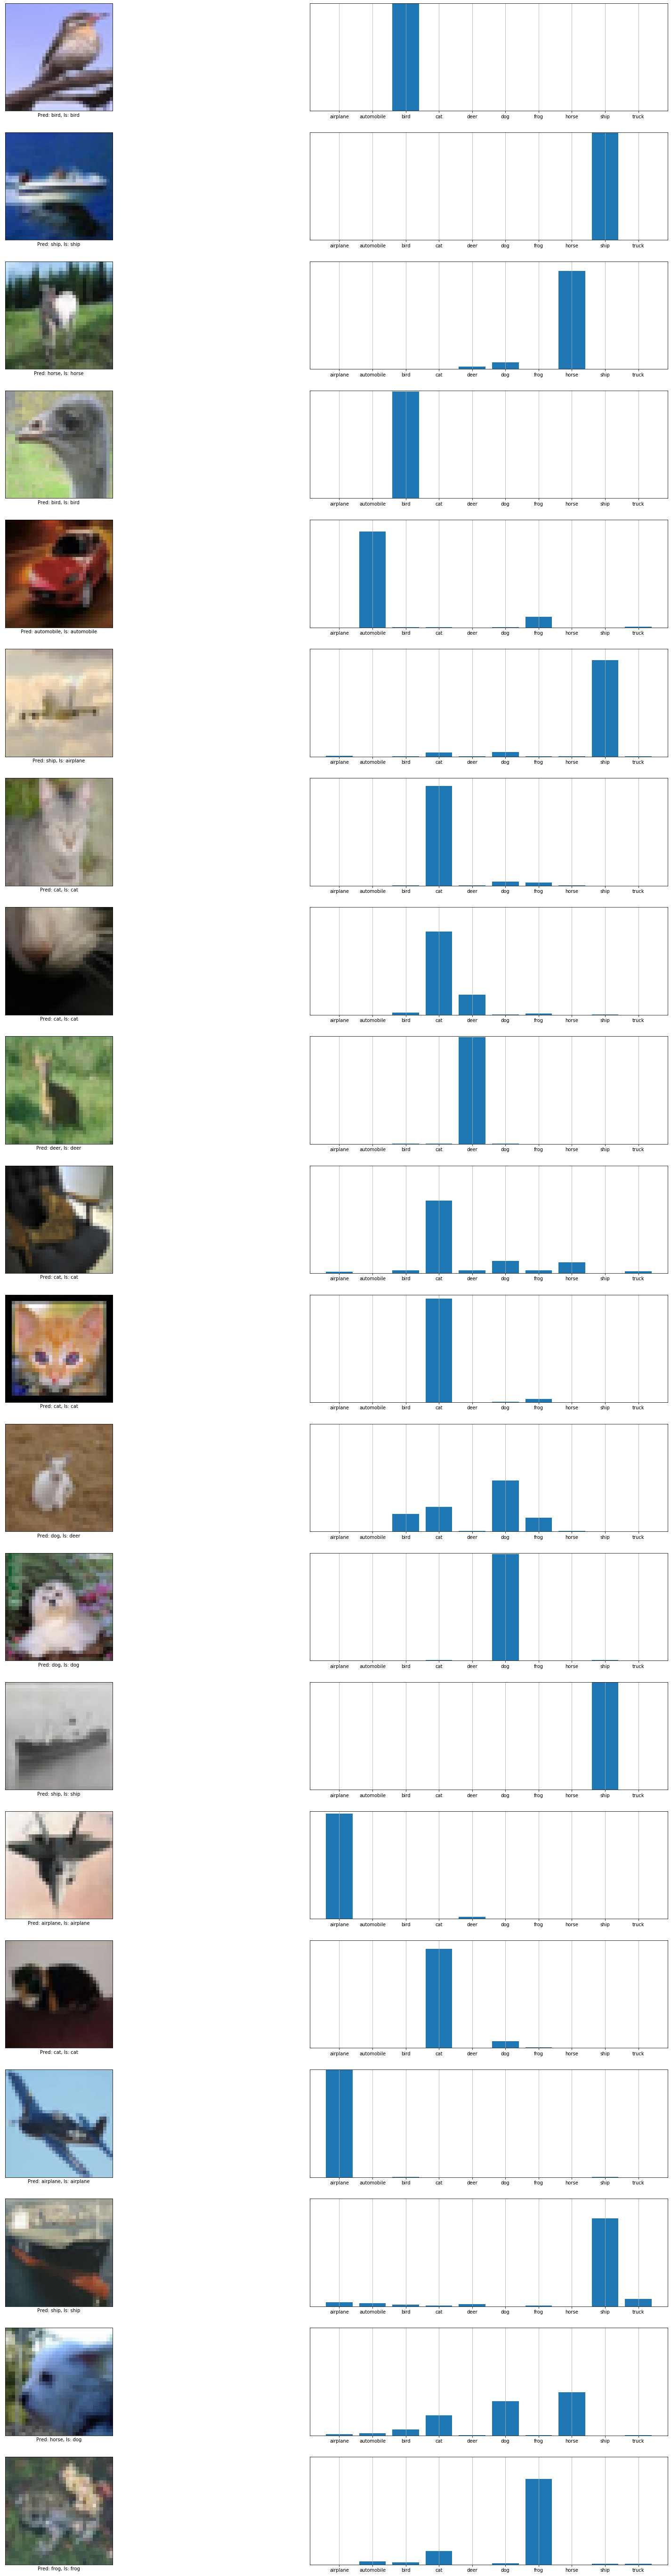

In [68]:
plt.figure(figsize=(30, 100))
rows = 20
cols = 2

pos = 0

for i in range(rows):
    pos += 1
    sp = plt.subplot(rows, cols, pos)
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    
    idx = random.randint(0, len(predictions) - 1)
    plt.imshow(x_test[idx])
    
    real = classes[y_test[idx][0]]
    predicted = classes[np.argmax(predictions[idx])]
    
    plt.xlabel("Pred: {}, Is: {}".format(predicted, real))
    
    pos += 1
    plt.subplot(rows, cols, pos)
    plt.xticks(np.arange(10), classes)
    plt.yticks([])
    plt.grid(True)
    plt.bar(range(len(classes)), predictions[idx])
    plt.ylim([0, 1])

plt.show()